In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]=25, 20

In [2]:
co_df = pd.read_csv('J:\MMM_Data\customer_orders_df.csv')

In [3]:
co_df.describe()

,Order Line,Outlet,Requested Quantity,Shipped Quantity
count,33696.000000,33696.000000,33696.000000,33696.000000
mean,14.813598,4.675392,3.255758,3.255194
std,151.108684,3.082693,6.479469,6.477098
min,1.000000,1.000000,-125.000000,-125.000000
25%,1.000000,2.000000,1.000000,1.000000
50%,3.000000,4.000000,2.000000,2.000000
75%,8.000000,7.000000,2.000000,2.000000
max,5003.000000,10.000000,400.000000,400.000000


In [4]:
co_df.head(10)

,Order Number,Order Line,Outlet,Part,Creation Date,Requested Date,Shipped Date,Requested Quantity,Shipped Quantity
0,Order_01,1,1,8WW91511052540M,14.01.2017 00:00,14.01.2017,14.01.2017,-1.0,-1.0
1,Order_02,3,1,6YX87639578537D,07.01.2017 00:00,07.01.2017,09.01.2017,12.0,12.0
2,Order_02,7,1,4RQ12578481053J,30.12.2016 00:00,30.12.2016,30.12.2016,2.0,2.0
3,Order_03,1,1,2DS35615142379C,29.12.2016 00:00,29.12.2016,29.12.2016,3.0,3.0
4,Order_03,2,1,5DG98783853149R,27.12.2016 00:00,27.12.2016,06.01.2017,8.0,8.0
5,Order_03,5,1,6TL87424290587L,04.01.2017 00:00,04.01.2017,04.01.2017,5.5,5.5
6,Order_04,7,1,2CG15479205640M,28.12.2016 00:00,28.12.2016,28.12.2016,5.0,5.0
7,Order_04,12,1,5MI17503293098G,30.12.2016 00:00,31.12.2016,31.12.2016,6.0,6.0
8,Order_05,1,1,10LT38882262598Q,26.12.2016 00:00,26.12.2016,26.12.2016,1.0,1.0
9,Order_06,1,1,9DG12017945528Y,26.12.2016 00:00,26.12.2016,26.12.2016,2.0,2.0


In [5]:
co_df['Order Number'].nunique()

23080

In [6]:
co_df['Part'].nunique()

3776

In [7]:
co_df.rename(columns={'Requested Date': 'Requested_Date', 'Creation Date': 'Creation_Date', 'Shipped Date':'Shipped_Date'}, inplace=True)

In [8]:
co_df.rename(columns={'Order Number': 'Order_Number', 'Order Line': 'Order_Line', 'Requested Quantity':'Requested_Quantity', 'Shipped Quantity':'Shipped_Quantity'}, inplace=True)

In [9]:
print(co_df.columns)

Index(['Order_Number', 'Order_Line', 'Outlet', 'Part', 'Creation_Date',
       'Requested_Date', 'Shipped_Date', 'Requested_Quantity',
       'Shipped_Quantity'],
      dtype='object')


In [10]:
co_df['Creation_Date'] =pd.to_datetime(co_df.Creation_Date, format='%d.%m.%Y %H:%M')

In [11]:
co_df['Requested_Date'] =pd.to_datetime(co_df.Requested_Date, format='%d.%m.%Y')

In [12]:
co_df['Shipped_Date'] =pd.to_datetime(co_df.Shipped_Date, format='%d.%m.%Y')

In [13]:
sum(n < 1 for n in co_df['Requested_Quantity'].values)

1333

In [14]:
drop_Req_Quant=co_df.index[co_df["Requested_Quantity"] <= 0].tolist()

In [15]:
len(drop_Req_Quant)

1243

In [16]:
co_df=co_df.drop(co_df.index[drop_Req_Quant])

In [17]:
co_df.describe()

,Order_Line,Outlet,Requested_Quantity,Shipped_Quantity
count,32453.000000,32453.000000,32453.000000,32453.000000
mean,14.883555,4.679013,3.415528,3.414943
std,153.825366,3.088056,6.491223,6.488780
min,1.000000,1.000000,0.050000,0.050000
25%,1.000000,2.000000,1.000000,1.000000
50%,3.000000,4.000000,2.000000,2.000000
75%,8.000000,7.000000,3.000000,3.000000
max,5003.000000,10.000000,400.000000,400.000000


In [18]:
co_df.columns

Index(['Order_Number', 'Order_Line', 'Outlet', 'Part', 'Creation_Date',
       'Requested_Date', 'Shipped_Date', 'Requested_Quantity',
       'Shipped_Quantity'],
      dtype='object')

In [19]:
co_df['Delay']=(co_df['Shipped_Date']-co_df['Requested_Date']).dt.days

In [20]:
co_df["Deficit"]=co_df["Requested_Quantity"]-co_df["Shipped_Quantity"]

In [21]:
delay_list=co_df.index[co_df["Delay"] < 0].tolist()

In [22]:
c=0
j=0
for i in co_df['Delay']:
    if i > 0:
        c=c+1
        #print(co_df.iloc[j,:])
    j=j+1
print(c)

8829


In [23]:
len(delay_list)

3

In [24]:
plus_delay_list=co_df.index[co_df["Delay"] > 0].tolist()

In [25]:
len(plus_delay_list)

8829

In [26]:
len(co_df['Delay'].unique())

126

In [27]:
deficit_df=co_df.loc[co_df["Deficit"]>0]

In [28]:
deficit_df

,Order_Number,Order_Line,Outlet,Part,Creation_Date,Requested_Date,Shipped_Date,Requested_Quantity,Shipped_Quantity,Delay,Deficit
32878,Order_22675,4,10,2KF50481290204X,2019-12-10,2019-12-10,2019-12-25,40.0,21.0,15,19.0


In [29]:
part_index = co_df.index[co_df["Part"]=="8YE32821942352L"].tolist()

In [30]:
co_df_part = co_df.loc[co_df["Part"]=="8YE32821942352L"]

In [31]:
co_df_part_2 = co_df_part.loc[co_df_part["Outlet"]==2]

In [32]:
co_df_part_2.head(5)

,Order_Number,Order_Line,Outlet,Part,Creation_Date,Requested_Date,Shipped_Date,Requested_Quantity,Shipped_Quantity,Delay,Deficit
8387,Order_5464,4,2,8YE32821942352L,2018-01-05,2018-01-05,2018-01-05,6.5,6.5,0,0.0
8968,Order_5946,1,2,8YE32821942352L,2018-09-13,2018-09-13,2018-09-13,2.0,2.0,0,0.0
9909,Order_6699,50,2,8YE32821942352L,2017-02-09,2017-01-06,2017-01-06,10.0,10.0,0,0.0
9921,Order_6702,50,2,8YE32821942352L,2017-01-03,2017-01-06,2017-01-06,17.0,17.0,0,0.0
9953,Order_6714,14,2,8YE32821942352L,2017-02-26,2017-01-23,2017-01-27,21.0,21.0,4,0.0


In [33]:
len(co_df_part)

1021

In [34]:
len(co_df_part_2)

115

In [35]:
co_df_part.sort_values(by=['Requested_Date'], inplace=True, ascending=True)

C:\Users\sattwik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
co_df_part.head(10)

,Order_Number,Order_Line,Outlet,Part,Creation_Date,Requested_Date,Shipped_Date,Requested_Quantity,Shipped_Quantity,Delay,Deficit
18852,Order_13012,21,5,8YE32821942352L,2016-12-29,2016-12-29,2016-12-29,24.0,24.0,0,0.0
16731,Order_11556,2,4,8YE32821942352L,2017-01-04,2017-01-04,2017-01-04,3.0,3.0,0,0.0
3783,Order_3037,14,1,8YE32821942352L,2017-01-03,2017-01-04,2017-01-04,1.0,1.0,0,0.0
27482,Order_19193,7,8,8YE32821942352L,2017-01-05,2017-01-05,2017-01-05,7.0,7.0,0,0.0
9921,Order_6702,50,2,8YE32821942352L,2017-01-03,2017-01-06,2017-01-06,17.0,17.0,0,0.0
9909,Order_6699,50,2,8YE32821942352L,2017-02-09,2017-01-06,2017-01-06,10.0,10.0,0,0.0
23362,Order_16370,59,7,8YE32821942352L,2017-01-23,2017-01-08,2017-01-08,19.0,19.0,0,0.0
30151,Order_21089,3,9,8YE32821942352L,2017-01-08,2017-01-08,2017-01-08,9.0,9.0,0,0.0
3784,Order_3038,3,1,8YE32821942352L,2017-01-09,2017-01-09,2017-01-09,6.0,6.0,0,0.0
16726,Order_11552,30,4,8YE32821942352L,2017-01-11,2017-01-11,2017-01-11,2.0,2.0,0,0.0


In [37]:
co_df_part["Outlet"].values

array([5, 4, 1, ..., 2, 5, 1], dtype=int64)

C:\Users\sattwik\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


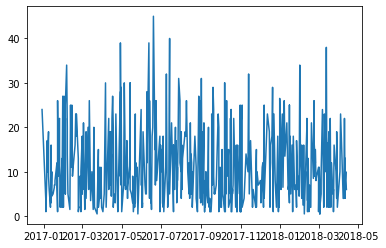

In [38]:
plt.plot(co_df_part["Requested_Date"].head(500), co_df_part["Requested_Quantity"].head(500))

In [39]:
parts_list=co_df["Part"].unique().tolist()

In [40]:
len(parts_list)

3738

In [41]:
unique_parts=[]
for part in parts_list:
    if part not in unique_parts:
        unique_parts.append(part)
print(len(unique_parts))

3738


## There are 3738 unique parts in the list

In [42]:
co_df_part.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 18852 to 7587
Data columns (total 11 columns):
Order_Number          1021 non-null object
Order_Line            1021 non-null int64
Outlet                1021 non-null int64
Part                  1021 non-null object
Creation_Date         1021 non-null datetime64[ns]
Requested_Date        1021 non-null datetime64[ns]
Shipped_Date          1021 non-null datetime64[ns]
Requested_Quantity    1021 non-null float64
Shipped_Quantity      1021 non-null float64
Delay                 1021 non-null int64
Deficit               1021 non-null float64
dtypes: datetime64[ns](3), float64(3), int64(3), object(2)
memory usage: 95.7+ KB


In [43]:
co_df_part.describe()

,Order_Line,Outlet,Requested_Quantity,Shipped_Quantity,Delay,Deficit
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0
mean,20.698335,4.231146,11.404701,11.404701,1.346719,0.0
std,157.258857,2.767006,8.855956,8.855956,4.742927,0.0
min,1.000000,1.000000,0.500000,0.500000,0.000000,0.0
25%,5.000000,2.000000,5.000000,5.000000,0.000000,0.0
50%,10.000000,4.000000,9.000000,9.000000,0.000000,0.0
75%,19.000000,7.000000,17.000000,17.000000,0.000000,0.0
max,5000.000000,10.000000,85.000000,85.000000,97.000000,0.0


In [44]:
co_df_part["Indexdate"]=co_df_part["Requested_Date"]

C:\Users\sattwik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
co_df_part_indexed=co_df_part.set_index(["Indexdate"])

In [46]:
co_df_part_indexed.head(30)

,Order_Number,Order_Line,Outlet,Part,Creation_Date,Requested_Date,Shipped_Date,Requested_Quantity,Shipped_Quantity,Delay,Deficit
Indexdate,,,,,,,,,,,
2016-12-29,Order_13012,21,5,8YE32821942352L,2016-12-29,2016-12-29,2016-12-29,24.0,24.0,0,0.0
2017-01-04,Order_11556,2,4,8YE32821942352L,2017-01-04,2017-01-04,2017-01-04,3.0,3.0,0,0.0
2017-01-04,Order_3037,14,1,8YE32821942352L,2017-01-03,2017-01-04,2017-01-04,1.0,1.0,0,0.0
2017-01-05,Order_19193,7,8,8YE32821942352L,2017-01-05,2017-01-05,2017-01-05,7.0,7.0,0,0.0
2017-01-06,Order_6702,50,2,8YE32821942352L,2017-01-03,2017-01-06,2017-01-06,17.0,17.0,0,0.0
2017-01-06,Order_6699,50,2,8YE32821942352L,2017-02-09,2017-01-06,2017-01-06,10.0,10.0,0,0.0
2017-01-08,Order_16370,59,7,8YE32821942352L,2017-01-23,2017-01-08,2017-01-08,19.0,19.0,0,0.0
2017-01-08,Order_21089,3,9,8YE32821942352L,2017-01-08,2017-01-08,2017-01-08,9.0,9.0,0,0.0
2017-01-09,Order_3038,3,1,8YE32821942352L,2017-01-09,2017-01-09,2017-01-09,6.0,6.0,0,0.0


In [47]:
co_df_part_weekly = co_df_part_indexed.resample('W').sum()

In [48]:
co_df_part_weekly

,Order_Line,Outlet,Requested_Quantity,Shipped_Quantity,Delay,Deficit
Indexdate,,,,,,
2017-01-01,21,5,24.0,24.0,0,0.0
2017-01-08,185,33,66.0,66.0,0,0.0
2017-01-15,209,33,56.5,56.5,3,0.0
2017-01-22,147,35,81.2,81.2,20,0.0
2017-01-29,179,47,106.0,106.0,4,0.0
...,...,...,...,...,...,...
2019-12-08,115,24,69.5,69.5,1,0.0
2019-12-15,86,9,48.0,48.0,1,0.0
2019-12-22,46,16,45.0,45.0,0,0.0


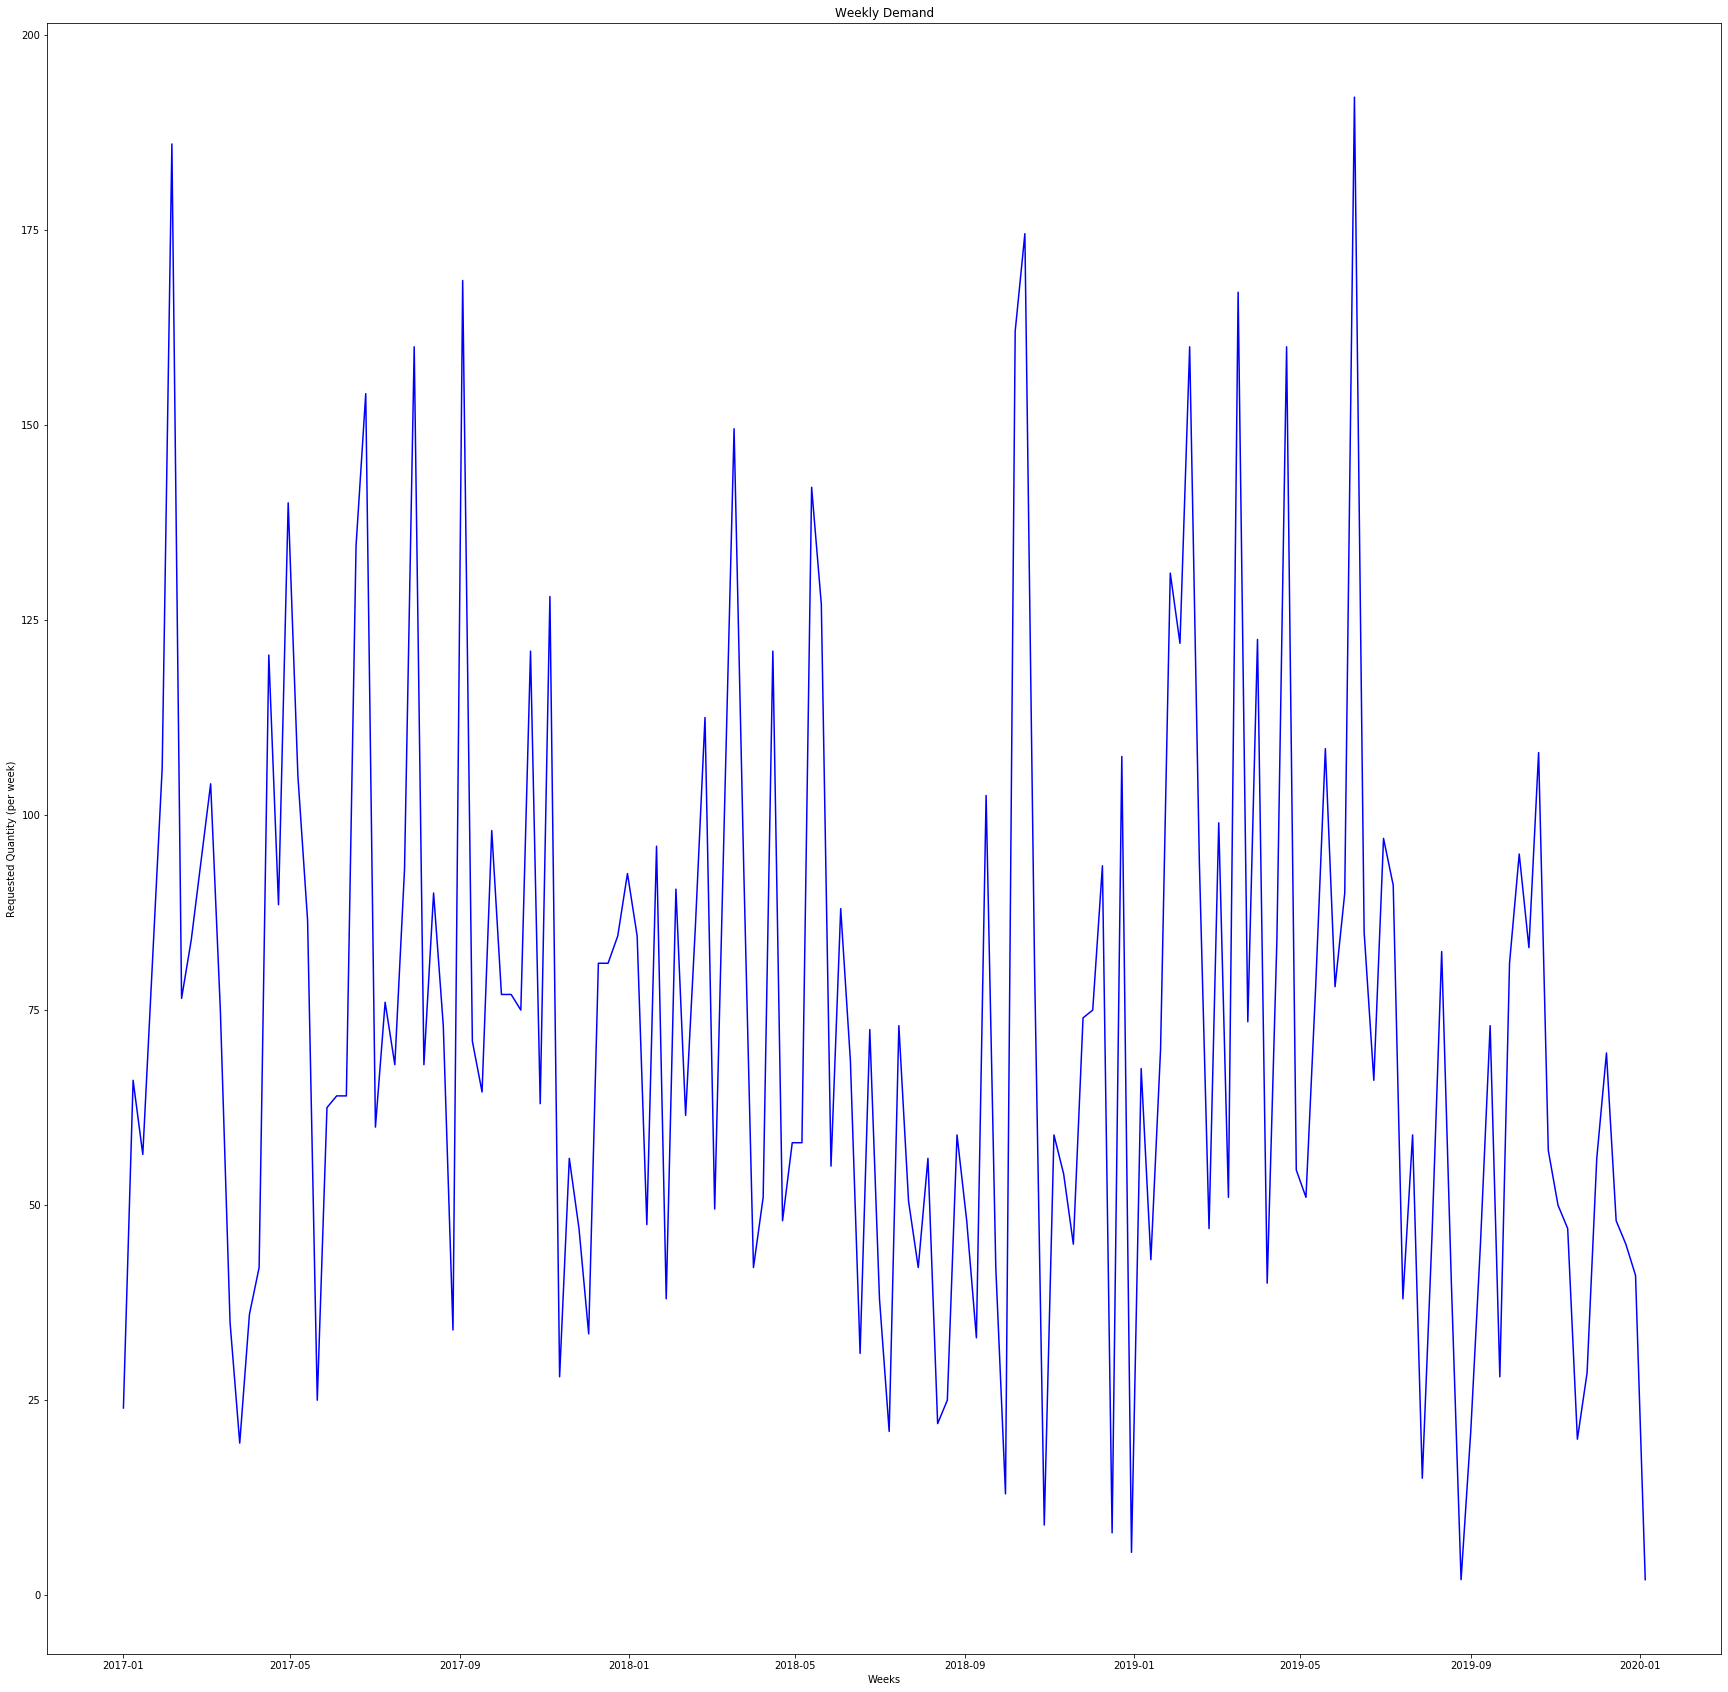

In [49]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(30, 30))

# Add x-axis and y-axis
ax.plot(co_df_part_weekly.index.values,
           co_df_part_weekly['Requested_Quantity'],
           color='blue')

# Set title and labels for axes
ax.set(xlabel="Weeks",
       ylabel="Requested Quantity (per week)",
       title="Weekly Demand")

plt.show()

In [50]:
co_df_part_monthly = co_df_part_indexed.resample('M').sum()

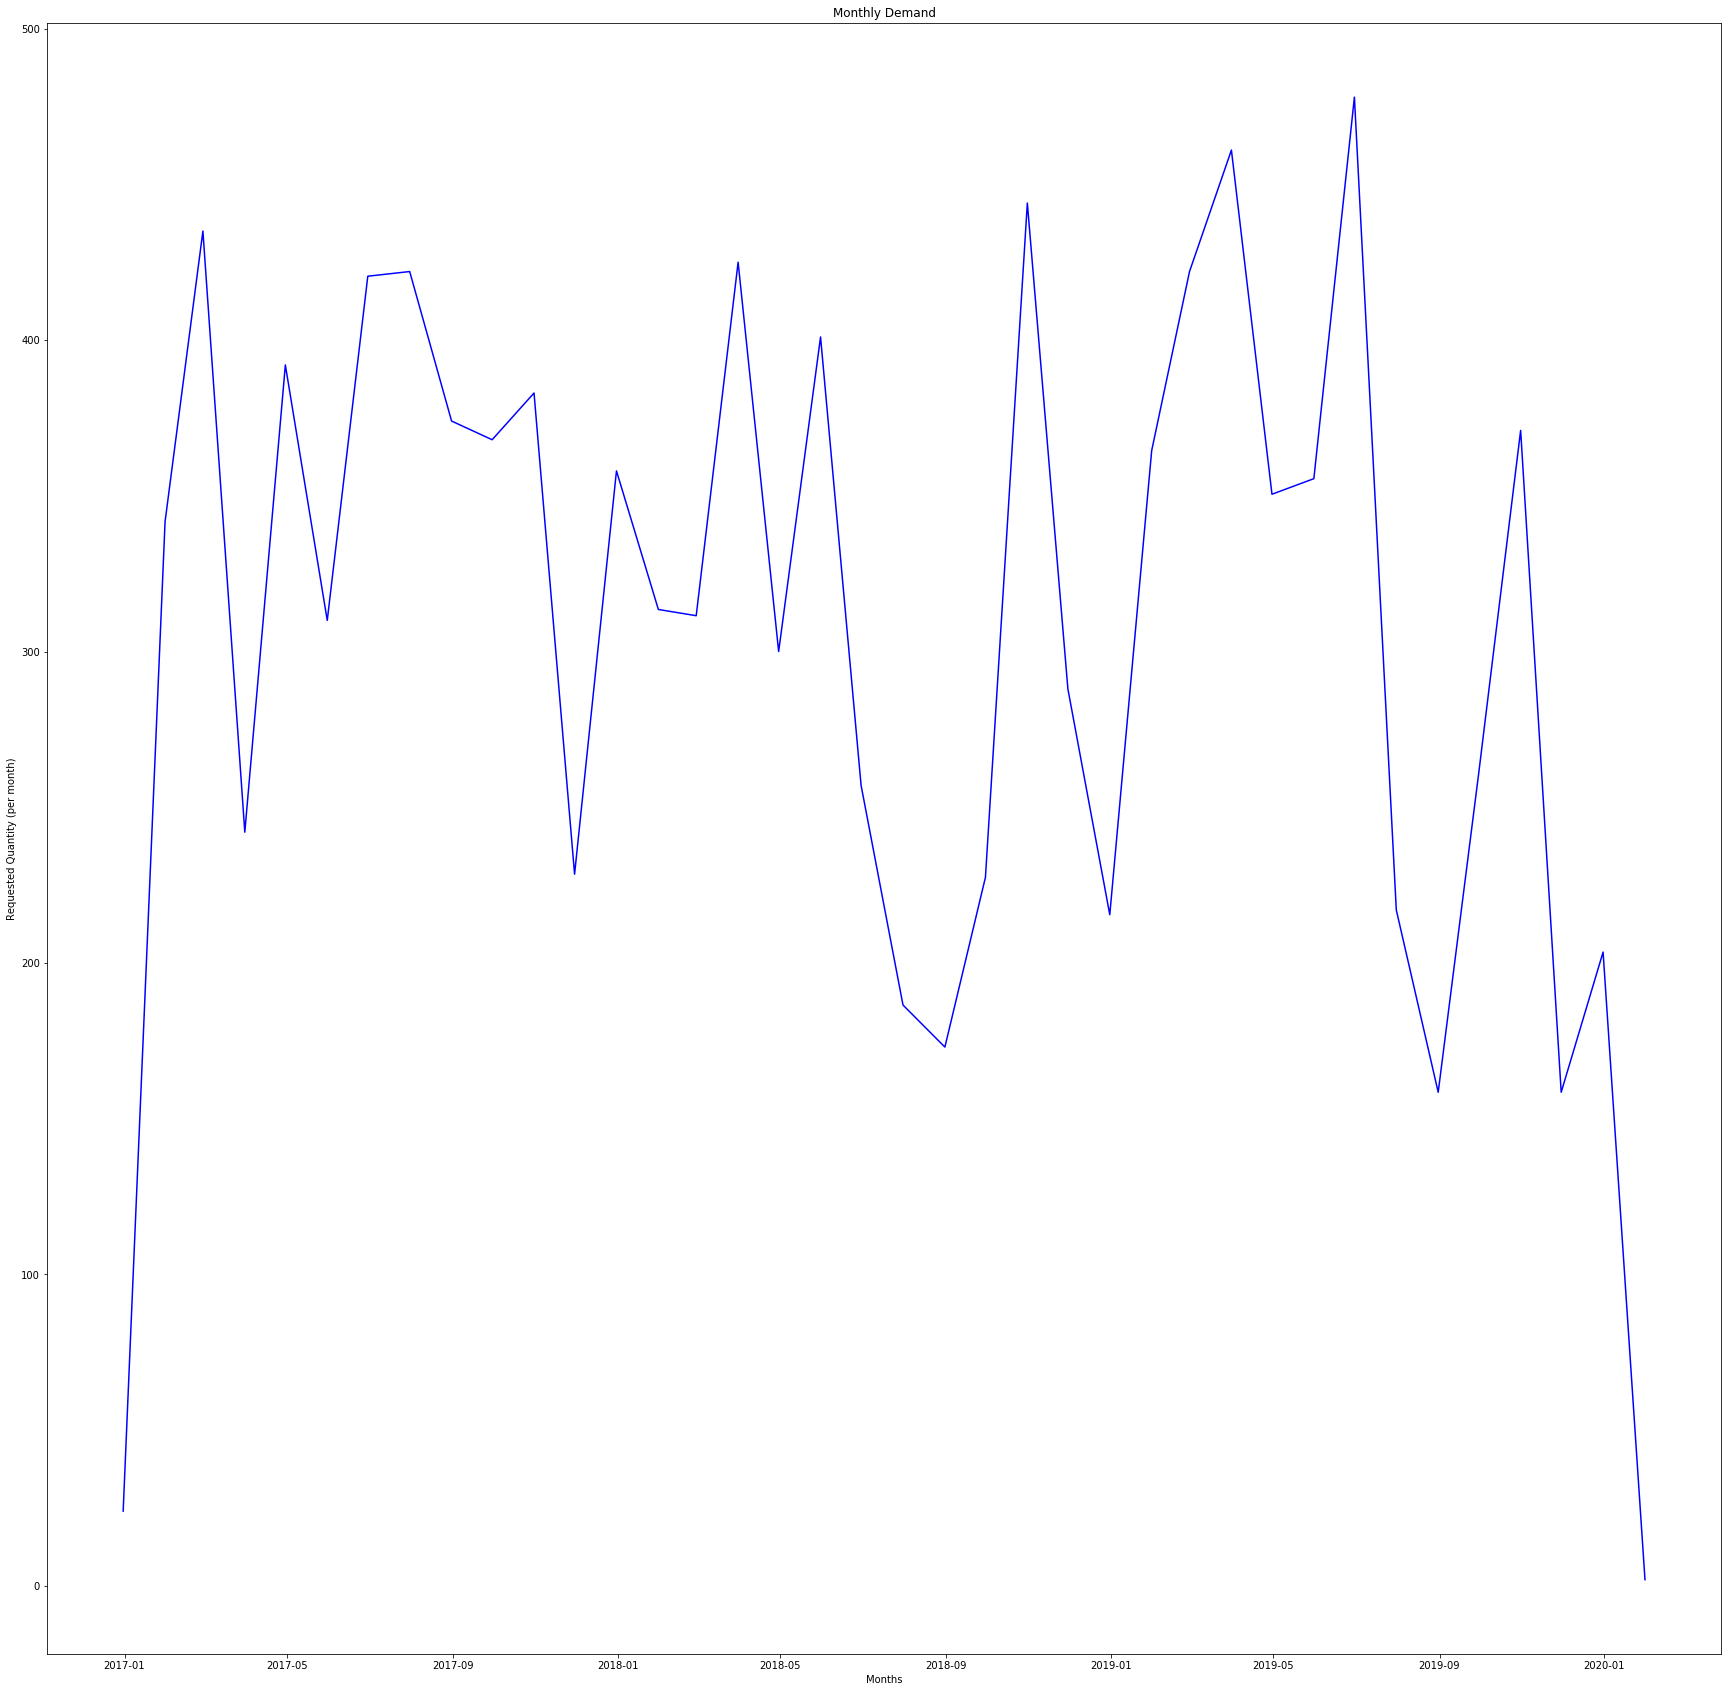

In [51]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(30, 30))

# Add x-axis and y-axis
ax.plot(co_df_part_monthly.index.values,
           co_df_part_monthly['Requested_Quantity'],
           color='blue')

# Set title and labels for axes
ax.set(xlabel="Months",
       ylabel="Requested Quantity (per month)",
       title="Monthly Demand")

plt.show()

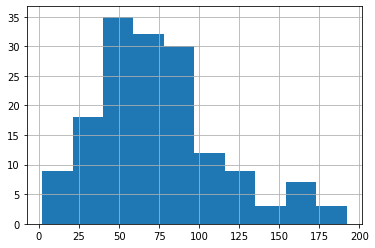

In [52]:
co_df_part_weekly['Requested_Quantity'].hist()

In [53]:
one, two, three = np.split(
    co_df_part_weekly['Requested_Quantity'].sample(frac=1), 
    [int(.25*len(co_df_part_weekly['Requested_Quantity'])),
        int(.75*len(co_df_part_weekly['Requested_Quantity']))])

mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print(mean1, mean2, mean3)
print(var1, var2, var3)

70.87179487179488 76.81012658227849 70.30499999999999
1806.5752361673412 1562.328870496592 1316.646641025641


In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

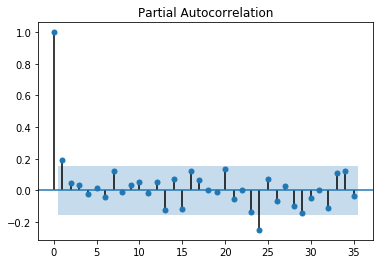

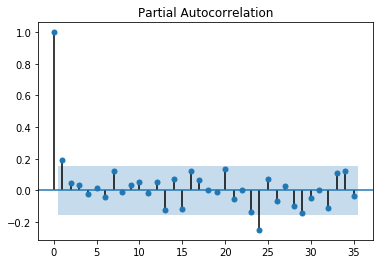

In [55]:
plot_pacf(co_df_part_weekly['Requested_Quantity'], lags=35)

In [56]:
#Perform Dickey-Fuller Test for stationarity on weekly data:

from statsmodels.tsa.stattools import adfuller

print("Result of Dickey Fuller Test: \n")

dftest = adfuller(co_df_part_weekly["Requested_Quantity"], autolag='AIC')

dftest_output = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'number of obserbations used'])
for key, value in dftest[4].items():
    dftest_output['Critical Values (%s)' %key]=value
    
print(dftest_output)

Result of Dickey Fuller Test: 

Test Statistic                -1.014906e+01
p-value                        8.040932e-18
#lags used                     0.000000e+00
number of obserbations used    1.570000e+02
Critical Values (1%)          -3.472703e+00
Critical Values (5%)          -2.880132e+00
Critical Values (10%)         -2.576683e+00
dtype: float64


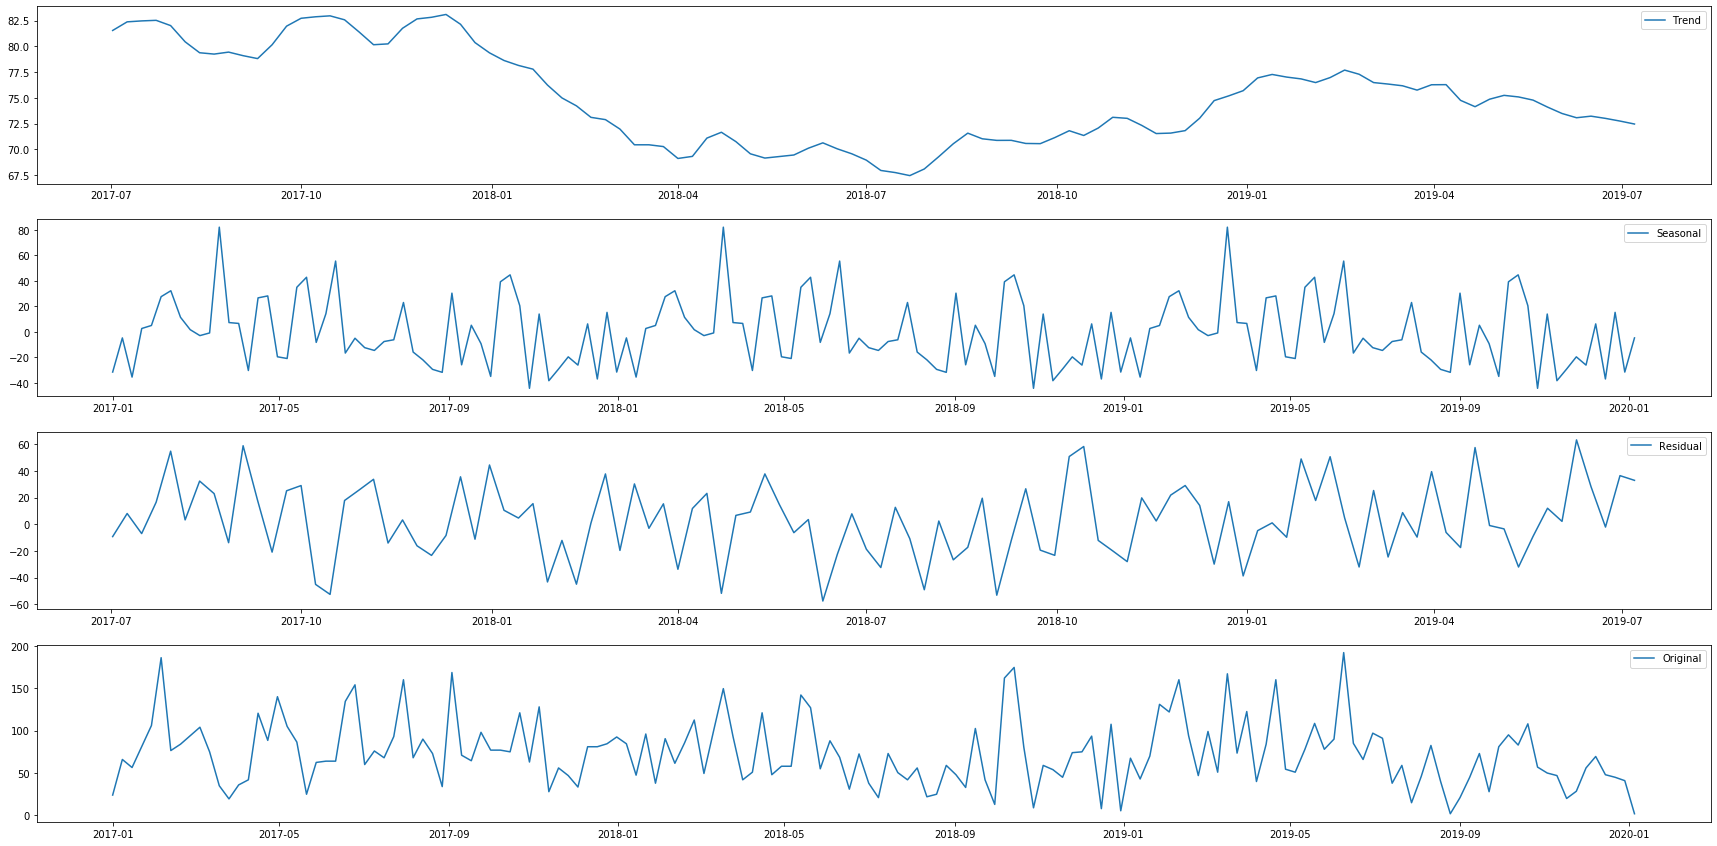

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(co_df_part_weekly["Requested_Quantity"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

f = plt.figure(figsize=(30,15))
ax1 = f.add_subplot(411)
ax2 = f.add_subplot(412)
ax3 = f.add_subplot(413)
ax4 = f.add_subplot(414)

ax1.plot(trend, label = 'Trend')
ax1.legend(loc='best')

ax2.plot(seasonal, label = 'Seasonal')
ax2.legend(loc='best')

ax3.plot(residual, label= 'Residual')
ax3.legend(loc='best')

ax4.plot(co_df_part_weekly.index, co_df_part_weekly['Requested_Quantity'], label= 'Original')
ax4.legend(loc='best')



In [58]:
from statsmodels.tsa.arima_model import ARIMA

# 1,0,1 ARIMA Model
model = ARIMA(co_df_part_weekly["Requested_Quantity"], order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:     Requested_Quantity   No. Observations:                  158
Model:                     ARMA(1, 1)   Log Likelihood                -800.780
Method:                       css-mle   S.D. of innovations             38.442
Date:                Sun, 19 Apr 2020   AIC                           1609.559
Time:                        22:08:06   BIC                           1621.810
Sample:                    01-01-2017   HQIC                          1614.534
                         - 01-05-2020                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       73.4008      4.110     17.859      0.000      65.345      81.457
ar.L1.Requested_Quantity     0.4652      0.354      1.315      0.191      -0.228       1.

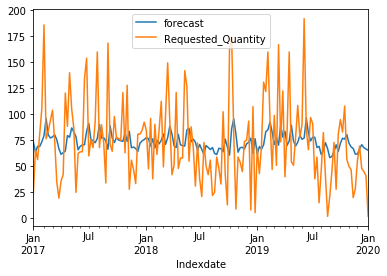

In [59]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [60]:
import itertools

In [61]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 0, 0, 52)


In [62]:
import statsmodels.api as sm

In [63]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(co_df_part_weekly['Requested_Quantity'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results=mod.fit()
            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 52)52 - AIC:1837.85333970875


C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 52)52 - AIC:3999.755622953425
ARIMA(0, 0, 0)x(0, 1, 0, 52)52 - AIC:1136.5857131373798
ARIMA(0, 0, 0)x(1, 0, 0, 52)52 - AIC:1133.3877530414702


C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 52)52 - AIC:4234.055131961917
ARIMA(0, 0, 0)x(1, 1, 0, 52)52 - AIC:567.2401952540696
ARIMA(0, 0, 1)x(0, 0, 0, 52)52 - AIC:1741.703979334153
ARIMA(0, 0, 1)x(0, 0, 1, 52)52 - AIC:8449.004430967489
ARIMA(0, 0, 1)x(0, 1, 0, 52)52 - AIC:1126.277170864163
ARIMA(0, 0, 1)x(1, 0, 0, 52)52 - AIC:1128.9424777016156


C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 52)52 - AIC:7713.557539466347
ARIMA(0, 0, 1)x(1, 1, 0, 52)52 - AIC:569.0882092412727
ARIMA(0, 1, 0)x(0, 0, 0, 52)52 - AIC:1662.8510479031013


C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
C:\Users\sattwik\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1014: RuntimeWarning: invalid value encountered in less
  params_variance = np.atleast_1d(max(np.array(params_variance), 1e-10))
C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\sattwik\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1855: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


ARIMA(0, 1, 0)x(0, 0, 1, 52)52 - AIC:nan
ARIMA(0, 1, 0)x(0, 1, 0, 52)52 - AIC:1182.519573507486
ARIMA(0, 1, 0)x(1, 0, 0, 52)52 - AIC:1123.1994722966394


C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 52)52 - AIC:nan
ARIMA(0, 1, 0)x(1, 1, 0, 52)52 - AIC:594.9223574156274
ARIMA(0, 1, 1)x(0, 0, 0, 52)52 - AIC:1582.9581058386461
ARIMA(0, 1, 1)x(0, 0, 1, 52)52 - AIC:9095.281256371814
ARIMA(0, 1, 1)x(0, 1, 0, 52)52 - AIC:1122.3596539772343
ARIMA(0, 1, 1)x(1, 0, 0, 52)52 - AIC:1077.223896691701
ARIMA(0, 1, 1)x(1, 0, 1, 52)52 - AIC:1058.3504321635933
ARIMA(0, 1, 1)x(1, 1, 0, 52)52 - AIC:561.7712631506366
ARIMA(1, 0, 0)x(0, 0, 0, 52)52 - AIC:1660.783397829008
ARIMA(1, 0, 0)x(0, 0, 1, 52)52 - AIC:4307.447385401067
ARIMA(1, 0, 0)x(0, 1, 0, 52)52 - AIC:1136.450974214331
ARIMA(1, 0, 0)x(1, 0, 0, 52)52 - AIC:1112.2790461606505


C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 52)52 - AIC:4591.002602788985
ARIMA(1, 0, 0)x(1, 1, 0, 52)52 - AIC:557.8055029769332
ARIMA(1, 0, 1)x(0, 0, 0, 52)52 - AIC:1593.678262748766


C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 52)52 - AIC:7448.521210176115
ARIMA(1, 0, 1)x(0, 1, 0, 52)52 - AIC:1125.106848294975
ARIMA(1, 0, 1)x(1, 0, 0, 52)52 - AIC:1078.8454911291853
ARIMA(1, 0, 1)x(1, 0, 1, 52)52 - AIC:8208.464714494503
ARIMA(1, 0, 1)x(1, 1, 0, 52)52 - AIC:556.6563418336564
ARIMA(1, 1, 0)x(0, 0, 0, 52)52 - AIC:1633.3131743348313


C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 52)52 - AIC:3850.23545708009
ARIMA(1, 1, 0)x(0, 1, 0, 52)52 - AIC:1167.8269553683442
ARIMA(1, 1, 0)x(1, 0, 0, 52)52 - AIC:1095.7836848296715
ARIMA(1, 1, 0)x(1, 0, 1, 52)52 - AIC:1097.1634932807146
ARIMA(1, 1, 0)x(1, 1, 0, 52)52 - AIC:568.9828075666848
ARIMA(1, 1, 1)x(0, 0, 0, 52)52 - AIC:1581.82617739338
ARIMA(1, 1, 1)x(0, 0, 1, 52)52 - AIC:9017.516153000779
ARIMA(1, 1, 1)x(0, 1, 0, 52)52 - AIC:1122.3150167763952
ARIMA(1, 1, 1)x(1, 0, 0, 52)52 - AIC:1068.862027127967
ARIMA(1, 1, 1)x(1, 0, 1, 52)52 - AIC:1059.8607045146343
ARIMA(1, 1, 1)x(1, 1, 0, 52)52 - AIC:552.7930833873943


## smallest AIC is for SARIMA(1,1,1)(1,1,0,52). We fit this model

In [64]:
mod = sm.tsa.statespace.SARIMAX(co_df_part_weekly['Requested_Quantity'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                 Requested_Quantity   No. Observations:                  158
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 52)   Log Likelihood                -272.397
Date:                            Sun, 19 Apr 2020   AIC                            552.793
Time:                                    22:10:17   BIC                            560.598
Sample:                                01-01-2017   HQIC                           555.785
                                     - 01-05-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1228      0.209     -0.589      0.556      -0.532       0.286
ma.L1         -0.9062      0.104   

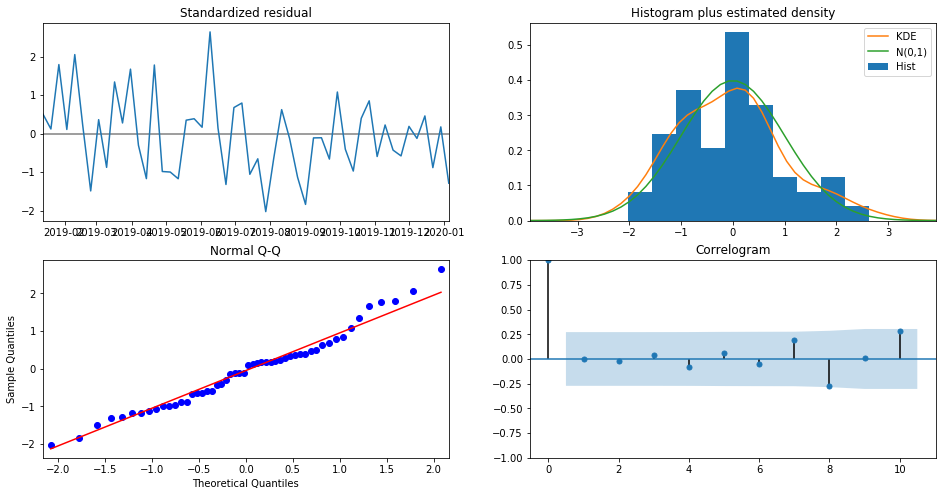

In [65]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [66]:
co_df_part_weekly.head(2)

,Order_Line,Outlet,Requested_Quantity,Shipped_Quantity,Delay,Deficit
Indexdate,,,,,,
2017-01-01,21,5,24.0,24.0,0,0.0
2017-01-08,185,33,66.0,66.0,0,0.0


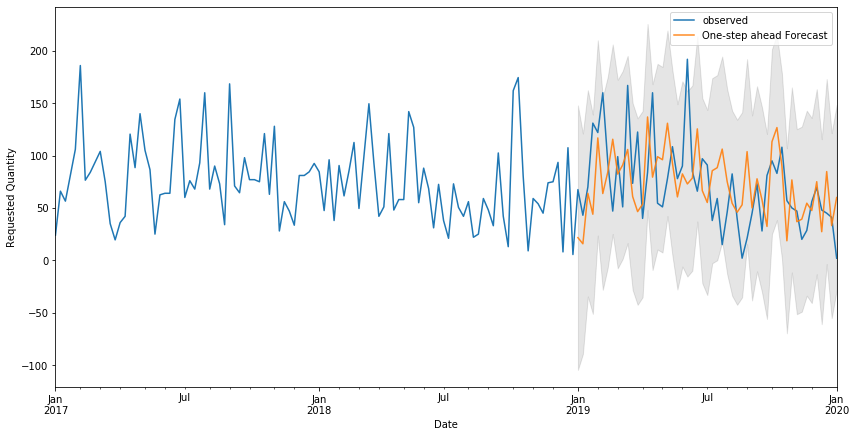

In [67]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-06'), dynamic=False)
pred_ci = pred.conf_int()
ax = co_df_part_weekly.Requested_Quantity['2017-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('Date')
ax.set_ylabel('Requested Quantity')
plt.legend()
plt.show()

In [68]:
predicted = results.predict()

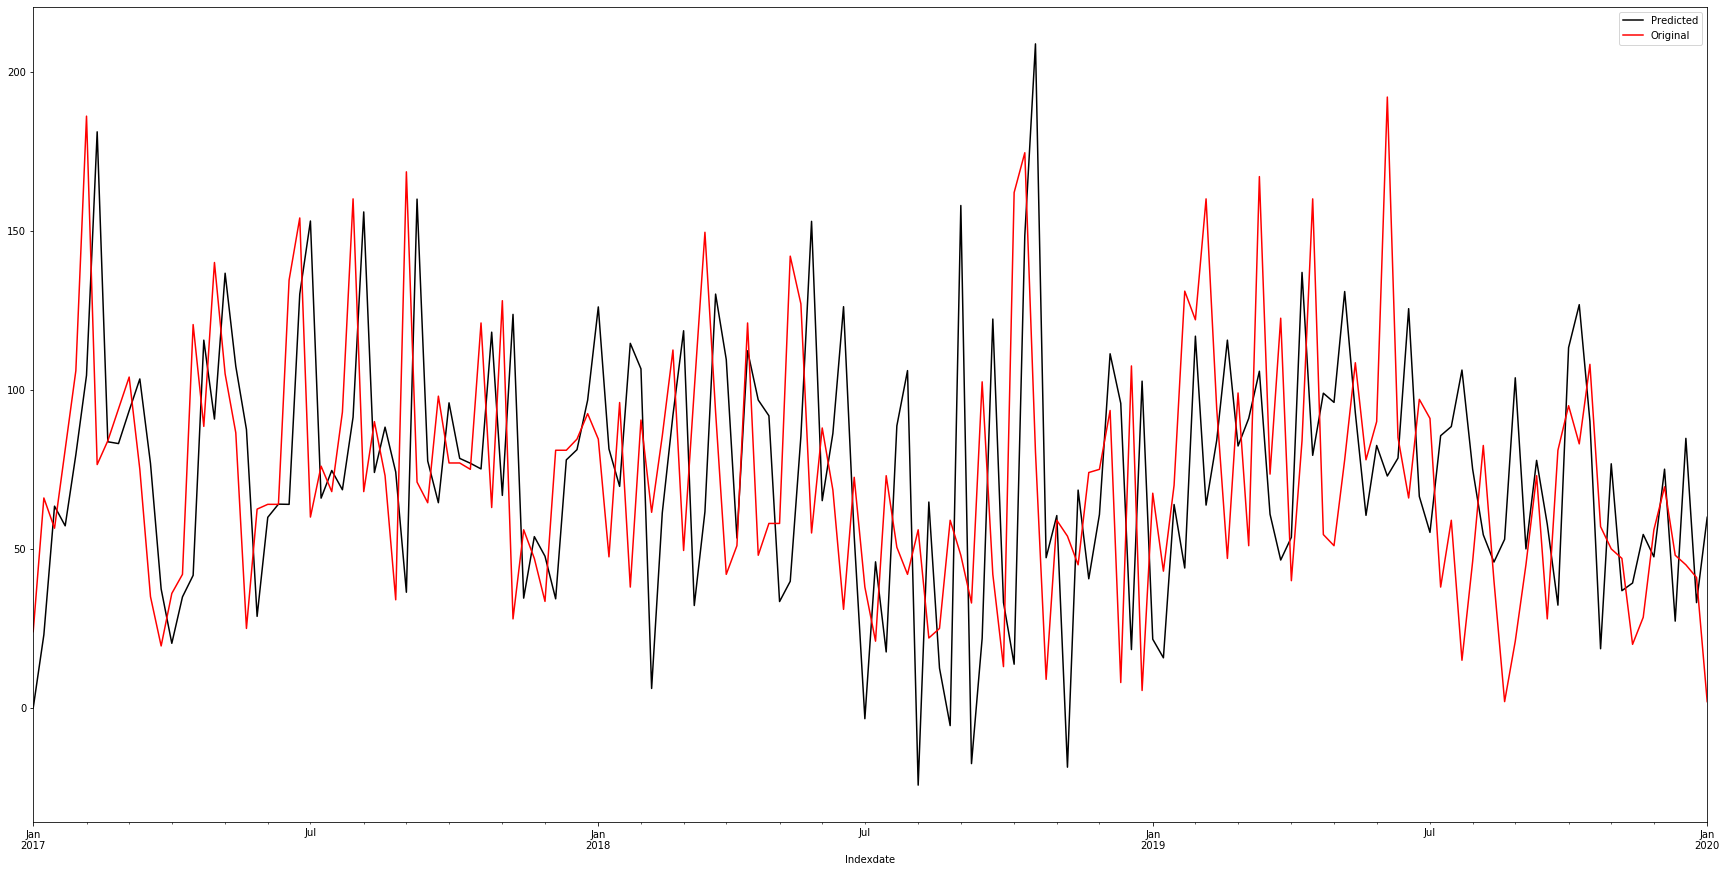

In [69]:
ax=predicted.plot(figsize=(30,15), color = 'k', label = 'Predicted')
co_df_part_weekly['Requested_Quantity'].plot(ax=ax, color = 'r', label = 'Original')
ax.legend()
plt.show()

In [70]:
co_df_part_1 = co_df_part_indexed.loc[co_df_part_indexed["Outlet"]==1]

In [71]:
co_df_part_1

,Order_Number,Order_Line,Outlet,Part,Creation_Date,Requested_Date,Shipped_Date,Requested_Quantity,Shipped_Quantity,Delay,Deficit
Indexdate,,,,,,,,,,,
2017-01-04,Order_3037,14,1,8YE32821942352L,2017-01-03,2017-01-04,2017-01-04,1.0,1.0,0,0.0
2017-01-09,Order_3038,3,1,8YE32821942352L,2017-01-09,2017-01-09,2017-01-09,6.0,6.0,0,0.0
2017-01-13,Order_3017,57,1,8YE32821942352L,2017-01-11,2017-01-13,2017-01-13,10.0,10.0,0,0.0
2017-01-13,Order_3024,52,1,8YE32821942352L,2017-01-23,2017-01-13,2017-01-14,4.5,4.5,1,0.0
2017-01-21,Order_3015,63,1,8YE32821942352L,2017-02-01,2017-01-21,2017-01-21,6.7,6.7,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-09,Order_4810,10,1,8YE32821942352L,2019-12-03,2019-12-09,2019-12-10,15.0,15.0,1,0.0
2019-12-14,Order_4795,27,1,8YE32821942352L,2019-11-24,2019-12-14,2019-12-14,2.0,2.0,0,0.0
2019-12-17,Order_4817,9,1,8YE32821942352L,2019-12-17,2019-12-17,2019-12-17,19.0,19.0,0,0.0


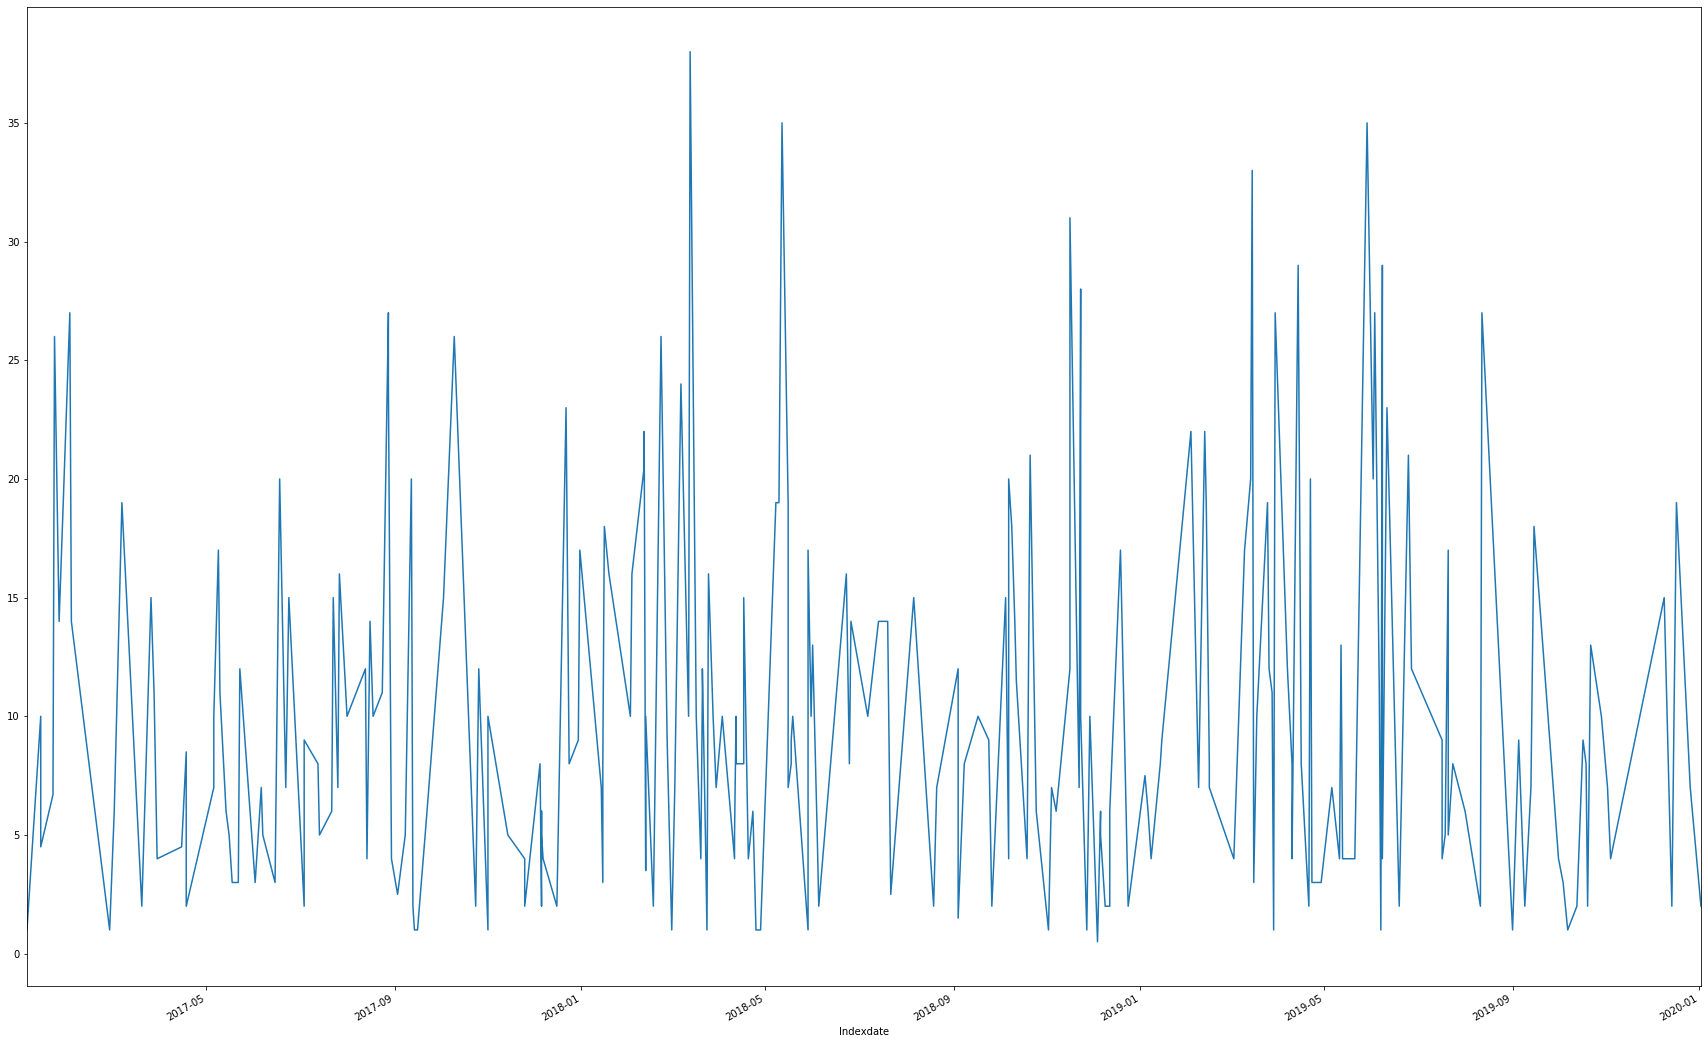

In [72]:
co_df_part_1["Requested_Quantity"].plot(figsize=(30,20))

In [73]:
co_df_part_1_monthly = co_df_part_1.resample('M').sum()

In [74]:
len(co_df_part_1_monthly)

37

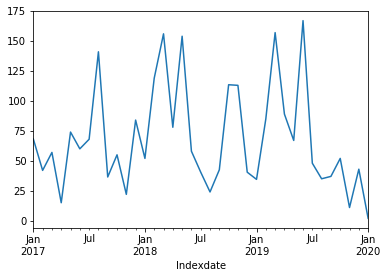

In [75]:
co_df_part_1_monthly["Requested_Quantity"].plot()

In [76]:
adfuller_result_part_1_monthly=adfuller(co_df_part_1_monthly["Requested_Quantity"])

In [77]:
adfuller_result_part_1_monthly

(-4.611669234147648,
 0.00012292146976972126,
 0,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 276.10885270597987)

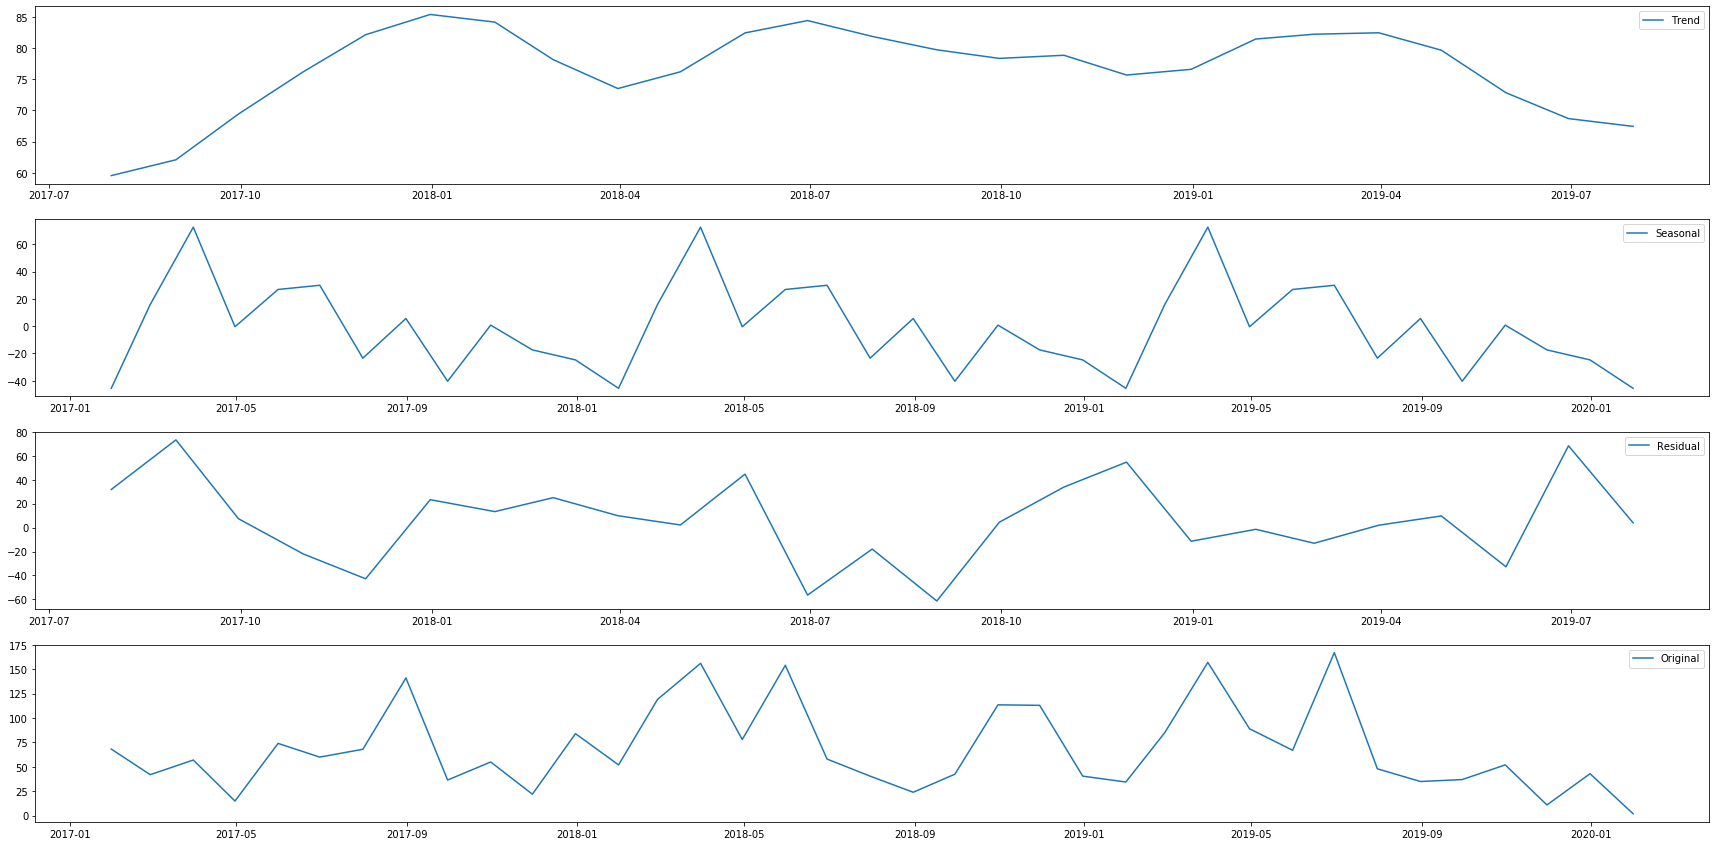

In [78]:
decomposition = seasonal_decompose(co_df_part_1_monthly["Requested_Quantity"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

f = plt.figure(figsize=(30,15))
ax1 = f.add_subplot(411)
ax2 = f.add_subplot(412)
ax3 = f.add_subplot(413)
ax4 = f.add_subplot(414)

ax1.plot(trend, label = 'Trend')
ax1.legend(loc='best')

ax2.plot(seasonal, label = 'Seasonal')
ax2.legend(loc='best')

ax3.plot(residual, label= 'Residual')
ax3.legend(loc='best')

ax4.plot(co_df_part_1_monthly.index, co_df_part_1_monthly['Requested_Quantity'], label= 'Original')
ax4.legend(loc='best')

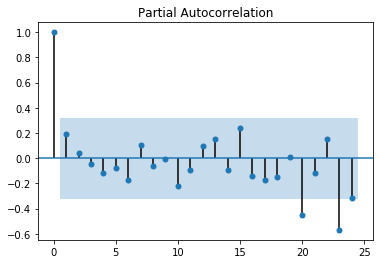

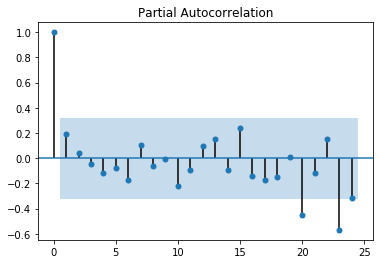

In [79]:
plot_pacf(co_df_part_1_monthly['Requested_Quantity'], lags=24)

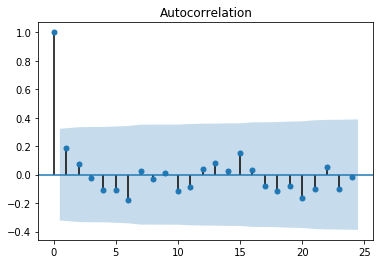

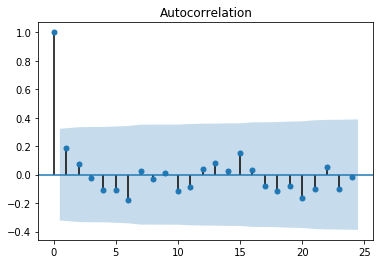

In [80]:
plot_acf(co_df_part_1_monthly['Requested_Quantity'], lags=24)

In [81]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(co_df_part_1_monthly['Requested_Quantity'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results=mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:421.03912023040243
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:267.79539063548225
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:278.0911750248952


C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:140.24583986895826
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:396.04128832110575


C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:256.9258311479691
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:277.8094529708518
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:257.4745848898283
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:142.15752226611602
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:382.6167610586691
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:266.38753299941175
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:266.74080174826065
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:139.1504202125523
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:362.30263911227814
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:248.99085893765616
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:261.22488134201075
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:134.66858823114399
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:390.0474728945794


C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:893.5376878348483
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:268.61370267182355
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:265.3897041127814
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:267.3478551575488
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:132.3633382761329
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:373.99510329627066
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:638.1570748975721
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:258.7631860133129
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:261.01870652626553
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:250.77498665181176
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:134.35975151427988
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:377.4818827329476
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:264.6067246819699
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:254.57258705730277
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:126.89183427884495
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:363.17160346413533
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:250.30053778753347
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:251.94941242707182


In [84]:
mod1 = sm.tsa.statespace.SARIMAX(co_df_part_1_monthly['Requested_Quantity'],
                                order=(1, 0, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results1 = mod1.fit()
print(results1.summary())

                                 Statespace Model Results                                 
Dep. Variable:                 Requested_Quantity   No. Observations:                   37
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                 -63.182
Date:                            Mon, 20 Apr 2020   AIC                            132.363
Time:                                    01:25:40   BIC                            133.818
Sample:                                01-31-2017   HQIC                           131.825
                                     - 01-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0957      0.470     -0.204      0.839      -1.017       0.826
ar.S.L12      -0.4041      0.218   

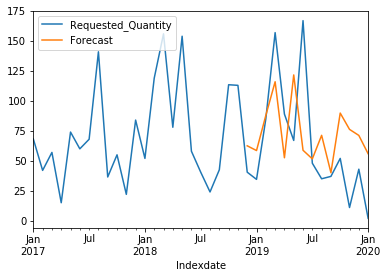

In [85]:
co_df_part_1_monthly['Forecast']=results1.predict(start=23, end = 37, dynamic = True)
co_df_part_1_monthly[['Requested_Quantity','Forecast']].plot()